In [1]:
import time
import datetime
from sklearn import datasets, svm, model_selection
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = datasets.load_breast_cancer()


In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
X = data.data
# 标签只要0和1
y = data.target

In [7]:
X.shape

(569, 30)

In [9]:
# 标签只要0和1
np.unique(y)

array([0, 1])

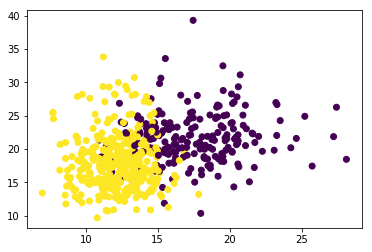

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=66)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    start_time = time.process_time()
    clf = svm.SVC(kernel=kernel, 
                  gamma='auto', 
                   # 在多项式核函数中 degree为1 处理线性可分问题 当设置为其他数，数据的计算量呈几何倍数增长 特征矩阵的degree次方
                  degree=1, 
                  cache_size=5000, # 分配多大内存来计算数据
                 ).fit(X_train, y_train)
    print('在%s核函数下计算的准确率：%.3f' % (kernel, clf.score(X_test, y_test)))
    print('所花费时间为：%f' % (time.process_time() - start_time))

在linear核函数下计算的准确率：0.947
所花费时间为：1.073226
在poly核函数下计算的准确率：0.930
所花费时间为：0.020191
在rbf核函数下计算的准确率：0.643
所花费时间为：0.010768
在sigmoid核函数下计算的准确率：0.643
所花费时间为：0.006048


In [16]:
# 在rbf上准确率比较低 接下来使用pandas分析数据
import pandas as pd
data = pd.DataFrame(X)


In [17]:
data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T


,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [19]:
# 有些列数据的差异化很大 很大的一个原因应该是量纲不统一 接下来开始对数据进行预处理
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
data = pd.DataFrame(X)
data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [20]:
# 数据标准化处理后再次使用核函数测试
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=66)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    start_time = time.process_time()
    clf = svm.SVC(kernel=kernel, 
                  gamma='auto', 
                   # 在多项式核函数中 degree为1 处理线性可分问题 当设置为其他数，数据的计算量呈几何倍数增长 特征矩阵的degree次方
                  degree=1, 
                  cache_size=5000, # 分配多大内存来计算数据
                 ).fit(X_train, y_train)
    print('在%s核函数下计算的准确率：%.3f' % (kernel, clf.score(X_test, y_test)))
    print('所花费时间为：%f' % (time.process_time() - start_time))

在linear核函数下计算的准确率：0.977
所花费时间为：0.003460
在poly核函数下计算的准确率：0.988
所花费时间为：0.003049
在rbf核函数下计算的准确率：0.977
所花费时间为：0.004170
在sigmoid核函数下计算的准确率：0.965
所花费时间为：0.003476


0.9824561403508771 0.004291934260128779


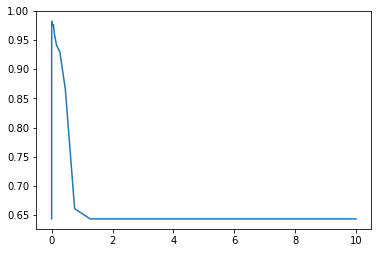

In [23]:
# 探索’rbf‘下gamma与正确率的关系
score = []
gamma_range = np.logspace(-10, 1, 50)
for i in gamma_range:
    clf = svm.SVC(kernel='rbf', gamma=i, cache_size=5000).fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range, score)
plt.show()


In [24]:
# 接下来探索gamma, coef0, degree对’poly‘的影响
# 我们使用网格搜索来共同调整这三个参数对多项核函数的影响
from sklearn import model_selection

In [26]:
start_time = time.process_time()

gamma_range = np.logspace(-10, 1, 20)
coef0_range = np.linspace(0, 5, 10)
param_grid = dict(gamma= gamma_range, coef0= coef0_range)
cv = model_selection.StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=66)
clf = svm.SVC(kernel='poly', degree=1, cache_size=5000)
grid = model_selection.GridSearchCV(clf, param_grid=param_grid, cv=cv)
grid.fit(X, y)

print('最好的参数是：%s， 准确率为：%.5f' % (grid.best_params_, grid.best_score_))
print('所花费时间为：%f' % (time.process_time() - start_time))

最好的参数是：{'coef0': 0.0, 'gamma': 0.18329807108324375}， 准确率为：0.97193
所花费时间为：6.564835


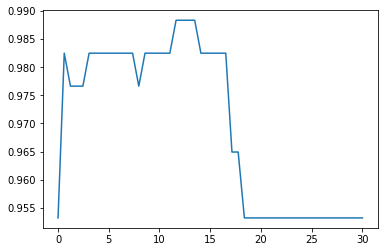

In [27]:
# 探索C 对结果的影响
score = []
c_range = np.linspace(0.001, 30, 50)
for i in c_range:
    clf = svm.SVC(kernel='linear', C=i, cache_size=5000).fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
plt.plot(c_range, score)
plt.show()

0.9883040935672515 14.69438775510204


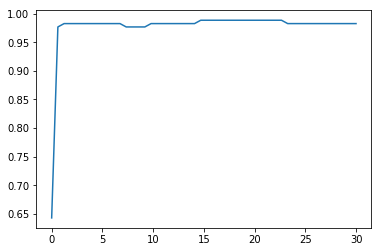

In [29]:
# 探索’rbf‘下C与正确率的关系 由下图可以看出rbf就是这么稳
score = []
c_range = np.linspace(0.001, 30, 50)
for i in c_range:
    clf = svm.SVC(kernel='rbf', C=i, gamma=0.004291934260128779,cache_size=5000).fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
print(max(score), c_range[score.index(max(score))])
plt.plot(c_range, score)
plt.show()


0.9883040935672515 14.306122448979592


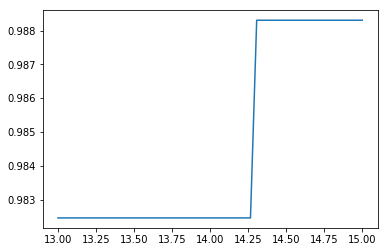

In [30]:
# 进一步细化C
score = []
c_range = np.linspace(13, 15, 50)
for i in c_range:
    clf = svm.SVC(kernel='rbf', C=i, gamma=0.004291934260128779,cache_size=5000).fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
print(max(score), c_range[score.index(max(score))])
plt.plot(c_range, score)
plt.show()